In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData


In [30]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [31]:
filename = 'Dataset/ionosphere.csv'
dataset,label=getData(filename)
# dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
print(dataset)
print(label)

[[1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453], [1.0, 0.0, 1.0, -0.18829, 0.93035, -0.36156, -0.10868, -0.93597, 1.0, -0.04549, 0.50874, -0.67743, 0.34432, -0.69707, -0.51685, -0.97515, 0.05499, -0.62237, 0.33109, -1.0, -0.13151, -0.453, -0.18056, -0.35734, -0.20332, -0.26569, -0.20468, -0.18401, -0.1904, -0.11593, -0.16626, -0.06288, -0.13738, -0.02447], [1.0, 0.0, 1.0, -0.03365, 1.0, 0.00485, 1.0, -0.12062, 0.88965, 0.01198, 0.73082, 0.05346, 0.85443, 0.00827, 0.54591, 0.00299, 0.83775, -0.13644, 0.75535, -0.0854, 0.70887, -0.27502, 0.43385, -0.12062, 0.57528, -0.4022, 0.58984, -0.22145, 0.431, -0.17365, 0.60436, -0.2418, 0.56045, -0.38238], [1.0, 0.0, 1.0, -0.45161, 1.0, 1.0, 0.71216, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.

In [32]:
import numpy as np


def split_data(dataset, label):
    # train-test split
    indices = np.random.permutation(len(dataset))
    training_idx, test_idx = indices[:221], indices[221:]
    x_train = [dataset[i] for i in training_idx]
    x_test = [dataset[i] for i in test_idx]
    y_train = [label[i] for i in training_idx]
    y_test = [label[i] for i in test_idx]

    return x_train, y_train, x_test, y_test

In [33]:
train_accuracy=[]
test_accuracy=[]
sensor=[]

In [34]:
########  sample ######
s=[]
for i in range(32,3,-4):
    s.append(i)

s

[32, 28, 24, 20, 16, 12, 8, 4]

In [35]:
sensor.clear()
train_accuracy.clear()
test_accuracy.clear()

In [36]:
for i in range(32, 3, -4):
    sensor.append(i)
    # --train-- pca with the "dataset" Dataframe
    pcaTrain = PCA(n_components=i).fit(dataset)
    # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
    compressed_dataset_X = pcaTrain.transform(dataset)

   # from NecessaryModules.splitData import split_data
    X_train, y_train, X_comb, y_comb = split_data(dataset, label)
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_comb, y_comb, test_size=0.50, random_state=42)

    # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
    compressed_dataset_X_train = pcaTrain.transform(X_train)
    # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
    compressed_dataset_X_valid = pcaTrain.transform(X_valid)
    # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
    compressed_dataset_X_test = pcaTrain.transform(X_test)

    compressed_dataset_X_valid.shape
    X_train_arr = compressed_dataset_X_train.reshape(
        compressed_dataset_X_train.shape[0], compressed_dataset_X_train.shape[1], 1)
    X_valid_arr = compressed_dataset_X_valid.reshape(
        compressed_dataset_X_valid.shape[0], compressed_dataset_X_valid.shape[1], 1)
    X_test_arr = compressed_dataset_X_test.reshape(
        compressed_dataset_X_test.shape[0], compressed_dataset_X_test.shape[1], 1)
    y_train_arr = np.array(y_train)
    y_train_arr = y_train_arr.reshape(y_train_arr.shape[0], 1)

    y_valid_arr = np.array(y_valid)
    y_valid_arr = y_valid_arr.reshape(y_valid_arr.shape[0], 1)

    y_test_arr = np.array(y_test)
    y_test_arr = y_test_arr.reshape(y_test_arr.shape[0], 1)

    from keras.utils import to_categorical
    # one hot encoding
    y_train_arr = to_categorical(y_train, 2)
    y_valid_arr = to_categorical(y_valid, 2)
    y_test_arr = to_categorical(y_test, 2)

    # model

    # cnn model
    from numpy import mean
    from numpy import std
    from numpy import dstack
    from pandas import read_csv
    from matplotlib import pyplot
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Flatten
    from keras.layers import Dropout
    from keras.layers import Conv1D
    from keras.layers import MaxPooling1D, LSTM

    import tensorflow as tf
    callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0,
        patience=7,
        verbose=0,
        mode='auto',
        baseline=None,
        restore_best_weights=True,
        start_from_epoch=0
    )
    verbose, epochs, batch_size = 1, 100, 20
    # fit and evaluate a model

    # fit and evaluate a model
    def evaluate_model_2(trainX, trainy, validX, validy, testX, testy):
        
        n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 2

        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                  input_shape=(n_timesteps, n_features)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(LSTM(units=64))  # remember the important features
        model.add(Dense(100, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))  # for regularization
        model.add(Dense(n_outputs, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam', metrics=['accuracy'])
        # fit network
        history = model.fit(trainX, trainy, validation_data=(
            validX, validy), epochs=epochs, batch_size=batch_size, callbacks=[callback], verbose=verbose)
        # evaluate model
        _, accuracy = model.evaluate(
            testX, testy, batch_size=batch_size, verbose=0)
        # '_,'-->a variable is being used for a specific purpose, but its value is not of interest or not used in the subsequent code.
        return accuracy, history

    score, history = evaluate_model_2(
        X_train_arr, y_train_arr, X_valid_arr, y_valid_arr, X_test_arr, y_test_arr)

    test_accuracy.append(score)
    train_accuracy.append(history.history['accuracy'][-1])

Epoch 1/100
12/12 [==============================] - 3s 71ms/step - loss: 0.6675 - accuracy: 0.8145 - val_loss: 0.6185 - val_accuracy: 0.8923
Epoch 2/100
12/12 [==============================] - 0s 15ms/step - loss: 0.5618 - accuracy: 0.8597 - val_loss: 0.4363 - val_accuracy: 0.8923
Epoch 3/100
12/12 [==============================] - 0s 15ms/step - loss: 0.3700 - accuracy: 0.8688 - val_loss: 0.3003 - val_accuracy: 0.8923
Epoch 4/100
12/12 [==============================] - 0s 13ms/step - loss: 0.4765 - accuracy: 0.8054 - val_loss: 0.3152 - val_accuracy: 0.8769
Epoch 5/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3814 - accuracy: 0.8462 - val_loss: 0.3043 - val_accuracy: 0.9077
Epoch 6/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3272 - accuracy: 0.8824 - val_loss: 0.3015 - val_accuracy: 0.8923
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 0.2808 - accuracy: 0.8914 - val_loss: 0.2619 - val_accuracy: 0.9077
Epoch 

In [37]:
print(len(sensor))
print(len(train_accuracy))
print(test_accuracy)

8
8
[0.9230769276618958, 0.9384615421295166, 1.0, 0.9230769276618958, 0.9846153855323792, 0.9692307710647583, 0.8769230842590332, 0.800000011920929]


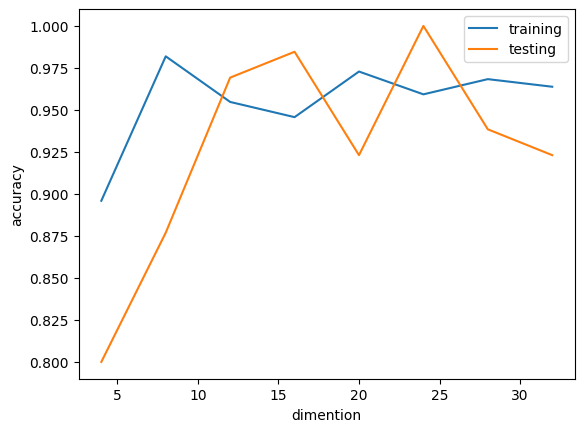

In [38]:

pyplot.plot(sensor,train_accuracy, label='training')
pyplot.plot(sensor,test_accuracy,label='testing')
# plt.axis([0, 34,0,1])
plt.xlabel('dimention')
plt.ylabel('accuracy')
# plt.title('Loss-curve')
pyplot.legend()
pyplot.show()